In [1]:
#Start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline

In [2]:
#Import Bee CSV
bees_data = pd.read_csv("honey bees.csv")
ghg_emissions_data = pd.read_csv("Table 2-10.csv")


In [3]:
# Group data by year and add up yearly totals
bees_data_df = bees_data.groupby(['year'])
bees_data_df = bees_data_df.sum()
bees_data_df.head ()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,
1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0
1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0
2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0
2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0
2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0


In [4]:
bees_data_df.index = bees_data_df.index.astype(int)
bees_data_df.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,
1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0
1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0
2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0
2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0
2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0


In [25]:
ghg_emissions_data.head()

,year,Transportation,Electric Power Industry,Industry,Agriculture,Commercial,Residential,CO2 from Fossil Fuel Combustion,CO2 from Fossil Fuel Combustion.1,Non-Energy Use of Fuels,Stationary Combustion,Total Emissions (Sources),LULUCF Sector Net Total b,Net Emissions (Sources and Sinks)
0,1998,"1,792.40","2,229.70","1,661.80",621.8,403.0,346.9,331.6,22.5,5.1,0.1,"7,083.30",-862.8,"6,220.50"
1,1999,"1,863.40","2,243.80","1,609.30",612.7,399.4,366.7,350.9,21.0,8.9,0.1,"7,125.40",-856.6,"6,268.80"
2,2000,"1,913.70","2,349.50","1,598.80",598.1,413.7,388.0,371.7,42.4,9.3,0.2,"7,313.60",-854.0,"6,459.70"
3,2001,"1,885.60","2,310.00","1,549.20",618.9,402.7,378.1,363.1,52.6,5.6,0.2,"7,203.00",-852.3,"6,350.70"
4,2002,"1,926.10","2,325.90","1,532.10",621.9,404.3,375.3,361.1,49.3,9.3,0.2,"7,244.30",-815.7,"6,428.60"


In [6]:
ghg_emissions_data.index = ghg_emissions_data.index.astype(int)
ghg_emissions_data.head()


,year,Transportation,Electric Power Industry,Industry,Agriculture,Commercial,Residential,CO2 from Fossil Fuel Combustion,CO2 from Fossil Fuel Combustion.1,Non-Energy Use of Fuels,Stationary Combustion,Total Emissions (Sources),LULUCF Sector Net Total b,Net Emissions (Sources and Sinks)
0,1998,"1,792.40","2,229.70","1,661.80",621.8,403.0,346.9,331.6,22.5,5.1,0.1,"7,083.30",-862.8,"6,220.50"
1,1999,"1,863.40","2,243.80","1,609.30",612.7,399.4,366.7,350.9,21.0,8.9,0.1,"7,125.40",-856.6,"6,268.80"
2,2000,"1,913.70","2,349.50","1,598.80",598.1,413.7,388.0,371.7,42.4,9.3,0.2,"7,313.60",-854.0,"6,459.70"
3,2001,"1,885.60","2,310.00","1,549.20",618.9,402.7,378.1,363.1,52.6,5.6,0.2,"7,203.00",-852.3,"6,350.70"
4,2002,"1,926.10","2,325.90","1,532.10",621.9,404.3,375.3,361.1,49.3,9.3,0.2,"7,244.30",-815.7,"6,428.60"


In [7]:
# Combine the data into a single dataset
ghg_honey = pd.merge(bees_data_df, ghg_emissions_data, how="left", on=["year", "year"])
ghg_honey.head()

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,Transportation,Electric Power Industry,Industry,Agriculture,Commercial,Residential,CO2 from Fossil Fuel Combustion,CO2 from Fossil Fuel Combustion.1,Non-Energy Use of Fuels,Stationary Combustion,Total Emissions (Sources),LULUCF Sector Net Total b,Net Emissions (Sources and Sinks)
0,1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0,"1,792.40","2,229.70","1,661.80",621.8,403.0,346.9,331.6,22.5,5.1,0.1,"7,083.30",-862.8,"6,220.50"
1,1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0,"1,863.40","2,243.80","1,609.30",612.7,399.4,366.7,350.9,21.0,8.9,0.1,"7,125.40",-856.6,"6,268.80"
2,2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0,"1,913.70","2,349.50","1,598.80",598.1,413.7,388.0,371.7,42.4,9.3,0.2,"7,313.60",-854.0,"6,459.70"
3,2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0,"1,885.60","2,310.00","1,549.20",618.9,402.7,378.1,363.1,52.6,5.6,0.2,"7,203.00",-852.3,"6,350.70"
4,2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0,"1,926.10","2,325.90","1,532.10",621.9,404.3,375.3,361.1,49.3,9.3,0.2,"7,244.30",-815.7,"6,428.60"


In [8]:
# Rename the headers
bees_data_renamed_df = bees_data_df.rename(columns={"state":"State", "numcol": "Number of Colonies",
                                     "yieldpercol":"Yield Per Colony","totalprod": "Total Production",
                                     "stocks": "Stocks", "priceperlb": "Price Per Pound", 
                                      "prodvalue": "Production Value", "year": "Year"})
bees_data_renamed_df


,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Production Value
year,,,,,,
1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0
1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0
2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0
2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0
2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0
2003,2591000.0,2752,181372000.0,40619000.0,65.77,252079000.0
2004,2539000.0,2657,182729000.0,60981000.0,52.67,197307000.0
2005,2394000.0,2635,173969000.0,62187000.0,49.00,160793000.0
2006,2378000.0,2536,154238000.0,60235000.0,53.45,157924000.0


In [9]:
#Count States in Dataset
bees_data['state'].nunique()

44

In [10]:
bees_data['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [11]:
#Average production of honey per state across the years
bees_state_prod = bees_data[['state', 'totalprod']].groupby('state').mean().round()

In [12]:
bees_state_prod = pd.DataFrame(bees_state_prod.groupby("state")["totalprod"].mean().round())

In [13]:
bees_state_prod.head(5)

,totalprod
state,
AL,667682.0
AR,2407182.0
AZ,1723091.0
CA,19721136.0
CO,1614273.0


In [14]:
bees_state_prod.sort_values('totalprod', ascending=False, inplace=True)

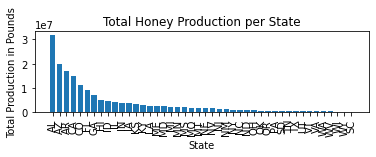

<Figure size 1080x288 with 0 Axes>

In [15]:
#Bar chart for total production per state
x_axis = np.arange(len(bees_state_prod))
tick_locations = bees_data['state'].unique()

plt.bar(x_axis, bees_state_prod['totalprod'])
plt.xticks(x_axis, tick_locations, rotation="vertical")


plt.title("Total Honey Production per State")
plt.xlabel("State")
plt.ylabel("Total Production in Pounds")
plt.subplots_adjust(bottom = .60)

plt.figure(figsize=(15, 4))



plt.show()


In [16]:
#Count years in dataset
bees_data['year'].nunique()

22

In [17]:
bees_data['year'].min()


1998

In [18]:
bees_data['year'].max()

2019

In [19]:
bees_data.columns


Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [20]:
bees_data_renamed_df.count()

Number of Colonies    22
Yield Per Colony      22
Total Production      22
Stocks                22
Price Per Pound       22
Production Value      22
dtype: int64

In [21]:
bees_data_renamed_df.describe()

,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Production Value
count,2.200000e+01,22.000000,2.200000e+01,2.200000e+01,22.000000,2.200000e+01
mean,2.574591e+06,2445.318182,1.683893e+08,4.942118e+07,76.775455,2.387700e+08
std,1.264138e+05,323.697299,2.308021e+07,1.655787e+07,31.079714,7.887202e+07
min,2.326000e+06,2035.000000,1.409070e+08,2.877700e+07,34.030000,1.236570e+08
25%,2.481250e+06,2170.000000,1.498615e+08,3.841425e+07,52.865000,1.609338e+08
50%,2.597500e+06,2360.000000,1.616645e+08,4.141100e+07,69.565000,2.410355e+08
75%,2.639250e+06,2728.250000,1.802455e+08,6.079450e+07,110.752500,3.124065e+08
max,2.782000e+06,3008.000000,2.195580e+08,8.495600e+07,120.470000,3.835140e+08


In [22]:
bees_data_renamed_df.dtypes

Number of Colonies    float64
Yield Per Colony        int64
Total Production      float64
Stocks                float64
Price Per Pound       float64
Production Value      float64
dtype: object

In [23]:
honeyprod_year = bees_data_renamed_df.astype('category')

In [24]:
honeyprod_year.describe()

,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Production Value
count,22.0,22,22.0,22.0,22.00,22.0
unique,22.0,22,22.0,22.0,22.00,22.0
top,2326000.0,2035,140907000.0,28777000.0,34.03,123657000.0
freq,1.0,1,1.0,1.0,1.00,1.0
